In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
class EfficientPortfolio:
    def __init__(self, tickers): ## I need to look into how efficient frontier is calculated in case of > 250 days
        self.tickers = tickers
        self.concat_tickers_df()
        
    def concat_tickers_df(self):
        files = [f'../data/{i}.csv' for i in tickers]
        df = pd.DataFrame()
        first = pd.read_csv(files[0], index_col = 'Date')['Adj Close'].rename(tickers[0])
        df.index = first.index
        df = df.join(first)

        for i in range(1, len(files)):
            ele = pd.read_csv(files[i], index_col = 'Date')['Adj Close'].rename(tickers[i])
            df = df.join(ele)

        self.df = df
        self.annual_returns = self.get_annual_return()
        self.annual_cov = self.get_annual_cov()
    
    def get_annual_return(self):
        return self.df.pct_change().mean() * 250
    
    def get_annual_cov(self):
        return self.df.pct_change().cov() * 250
    
    def markov(self, simulations=5000):
        num_stocks = len(self.tickers)
        num_portfolios = simulations # number of simulations

        random_weights = np.random.rand(num_portfolios, num_stocks) # creates a 2d array of random numbers. shape: (num_portfolios, num_stocks)
        random_weights = random_weights / np.sum(random_weights, axis = 1, keepdims=True) # normalise so that every row's sum = 1 (weights by definition)

        portfolio_returns = np.dot(random_weights, self.annual_returns)
        portfolio_volatility = np.sqrt(np.einsum('ij,ij->i', np.dot(random_weights, self.annual_cov), random_weights))
        
        return (random_weights, portfolio_returns, portfolio_volatility)
    
    def simulate(self, simulations=5000, return_df=False):
        random_weights, portfolio_returns, portfolio_volatility = self.markov(simulations)
        df = pd.DataFrame(random_weights, columns=tickers)
        df['Return'] = portfolio_returns
        df['Volatility'] = portfolio_volatility
        
        column_order = ['Return', 'Volatility'] + tickers
        df = df[column_order]
        df.plot.scatter(x='Volatility', y='Return')
        plt.title('Efficient Frontier')
        plt.xlabel('sigma')
        plt.ylabel('Expected Returns')
        plt.show()
        if return_df:
            return df
    

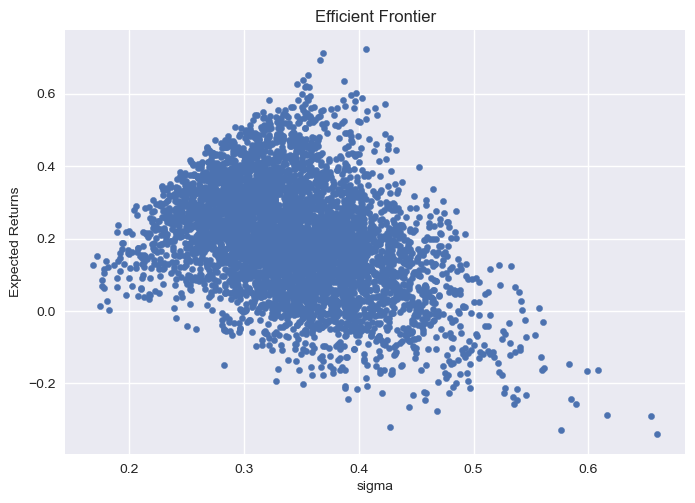

In [149]:
tickers = ['ABNB', "JNJ", "LCID", "NFLX", "QQQ"]
ep = EfficientPortfolio(tickers)
ep.simulate()

### Element wise 
class independent function. Easier to navigate, difficult to change inputs

In [58]:
# I need to work with multiple stocks, so I will create a df 
# with column names as stock tickers and values as adj close

tickers = ['ABNB', "JNJ", "LCID", "NFLX", "QQQ"]
files = [f'../data/{i}.csv' for i in tickers]
df = pd.DataFrame()
first = pd.read_csv(files[0], index_col = 'Date')['Adj Close'].rename(tickers[0])
df.index = first.index
df = df.join(first)

for i in range(1, len(files)):
    ele = pd.read_csv(files[i], index_col = 'Date')['Adj Close'].rename(tickers[i])
    df = df.join(ele)


In [60]:
df.tail()

,ABNB,JNJ,LCID,NFLX,QQQ
Date,,,,,
2023-06-29,125.099998,164.100006,6.880,428.239990,363.809998
2023-06-30,128.160004,165.520004,6.890,440.489990,369.420013
2023-07-03,132.350006,163.350006,7.390,441.440002,370.290009
2023-07-05,131.690002,162.809998,7.410,445.899994,370.279999
2023-07-06,126.870003,161.820007,6.922,432.279999,365.065002


In [67]:
annual_returns = df.pct_change().mean() * 250
annual_cov = df.pct_change().cov() * 250

In [132]:
num_stocks = len(tickers)
num_portfolios = 9000 # number of simulations

random_weights = np.random.rand(num_portfolios, num_stocks) # creates a 2d array of random numbers. shape: (num_portfolios, num_stocks)
random_weights = random_weights / np.sum(random_weights, axis = 1, keepdims=True) # normalise so that every row's sum = 1 (weights by definition)

portfolio_returns = np.dot(random_weights, annual_returns)
portfolio_volatility = np.sqrt(np.einsum('ij,ij->i', np.dot(random_weights, annual_cov), random_weights))

In [133]:
# Now I want to create a dataframe (with no indices) that show very stock's weight, portfolio return and volatality in each row

df = pd.DataFrame(random_weights, columns=tickers)
df['Return'] = portfolio_returns
df['Volatility'] = portfolio_volatility

In [134]:
column_order = ['Return', 'Volatility'] + tickers
df = df[column_order]

In [135]:
df.head()

,Return,Volatility,ABNB,JNJ,LCID,NFLX,QQQ
0,0.333384,0.290764,0.177448,0.315809,0.104518,0.331854,0.070371
1,0.060853,0.285509,0.168963,0.320765,0.189233,0.051095,0.269944
2,0.054022,0.408580,0.211291,0.070127,0.318831,0.079105,0.320646
3,0.111399,0.316754,0.124860,0.342370,0.235204,0.204416,0.093151
4,0.042438,0.335187,0.162904,0.286248,0.262844,0.104490,0.183515


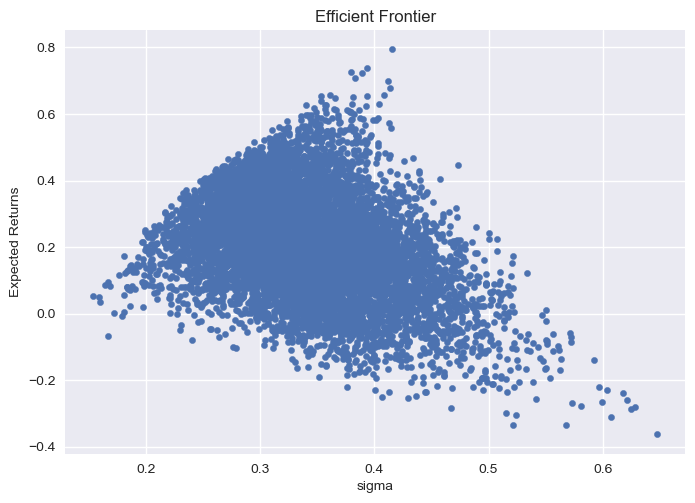

In [136]:
df.plot.scatter(x='Volatility', y='Return')
plt.title('Efficient Frontier')
plt.xlabel('sigma')
plt.ylabel('Expected Returns')
plt.show()